# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FachryYusrie/Proyek-Machine-Learning-Shop-Customer/refs/heads/main/Data/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# info mengenai jumlah baris dan kolom pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
# statistik deskriptif tiap atribut pada data
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


In [5]:
# memeriksa atribut yang memiliki missing value
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


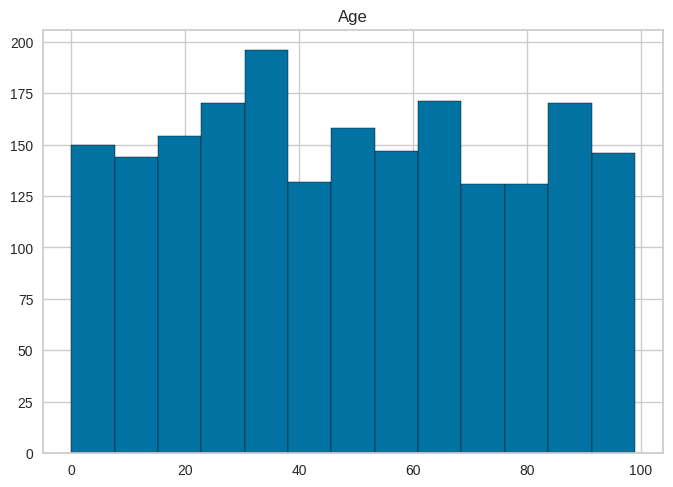

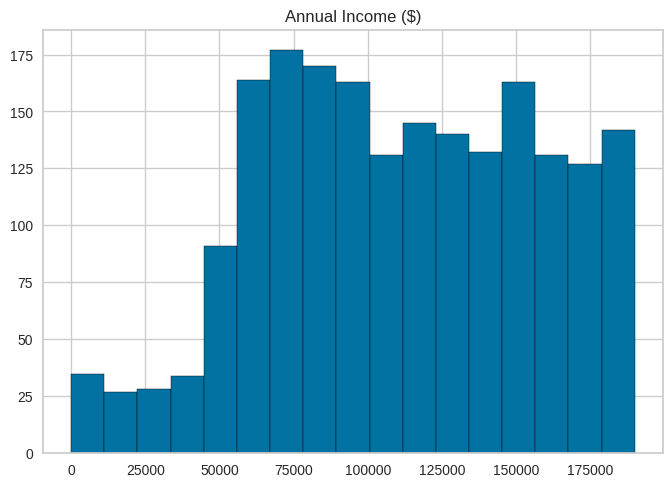

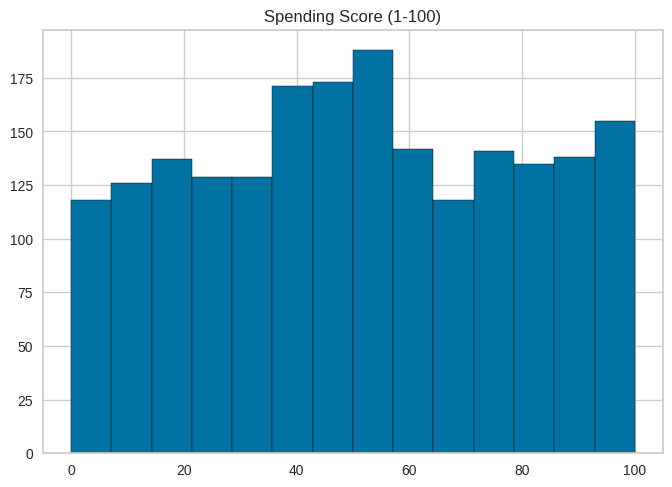

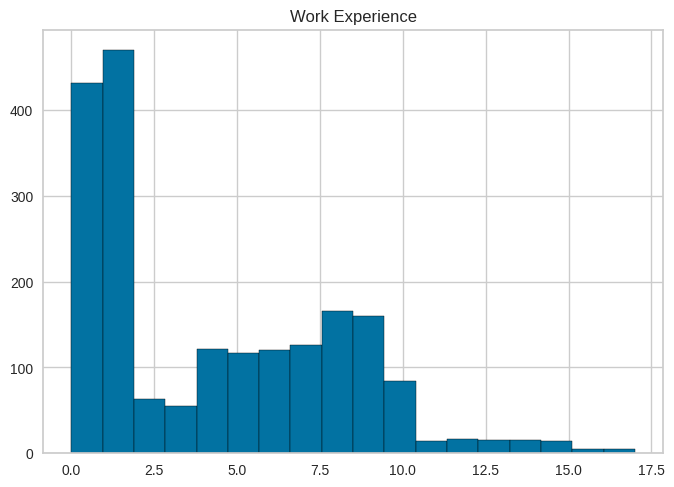

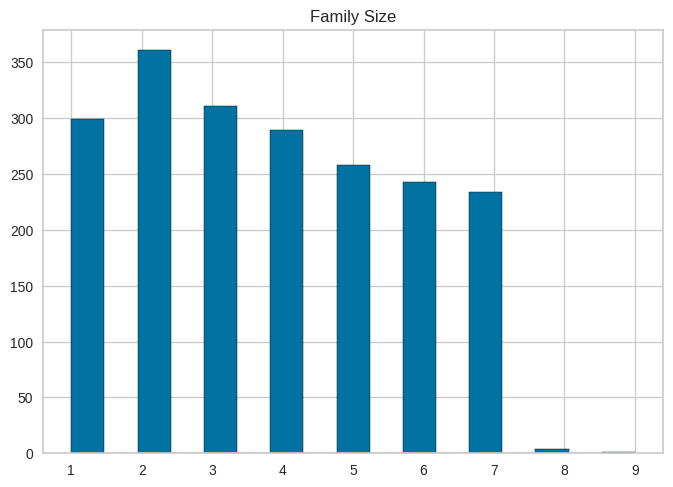

In [6]:
# visualisasi distribusi data numerik
num_col = ['Age','Annual Income ($)', 'Spending Score (1-100)','Work Experience','Family Size']
for col in num_col:
    # membuat plot distribusi dari kolom numerik
    plt.hist(df[col], bins='auto', edgecolor='black')
    plt.title(col)
    plt.show()

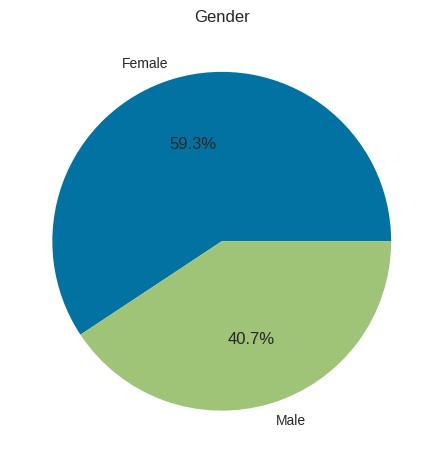

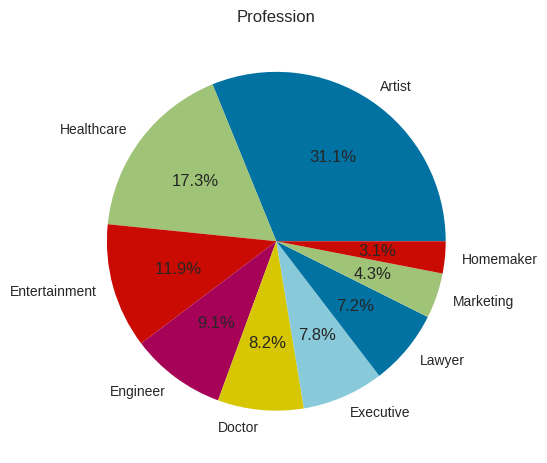

In [7]:
# visualisasi distribusi data kategori
cat_col = ['Gender','Profession']
for col in cat_col:
    # membuat plot distribusi dari kolom kategori
    # menghitung nilai frekuensi dari setiap kolom
    catcol_counts = df[col].value_counts()

    # membuat distribusi dalam bentuk pie chart
    plt.pie(catcol_counts.values, labels=catcol_counts.index, autopct='%1.1f%%')
    plt.title(col)
    plt.show()

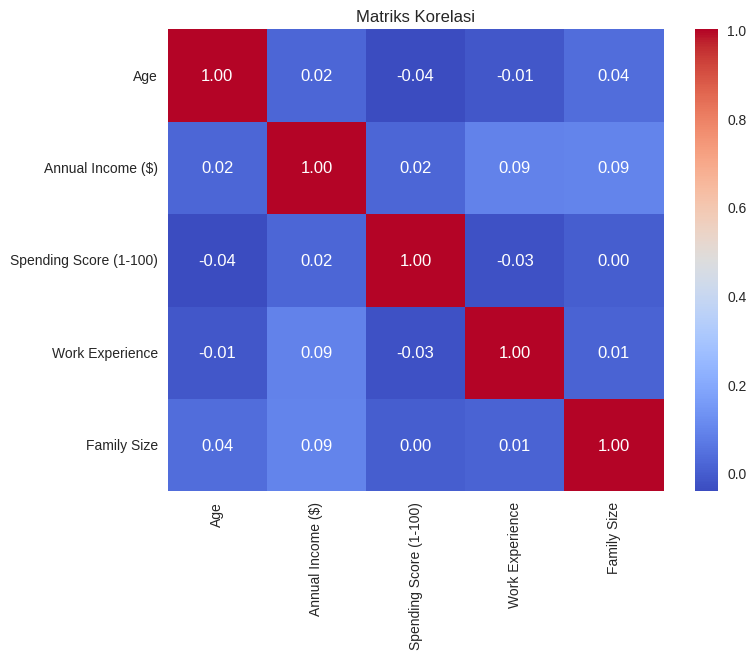

In [8]:
# Matriks Korelasi
correlation_matrix = df[num_col].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [9]:
# df_proc digunakan sebagai dataframe untuk pre-processing
df_proc = df.copy()

In [10]:
# drop kolom id karena tidak diperlukan dalam menemukan dalam analisis klastering
df_proc.drop(['CustomerID'], axis=1, inplace=True)
df_proc

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [11]:
# menangani missing value
# kolom 'Profession' memiliki 35 missing values sehingga dapat diganti dengan mode dari kolom
col2impute = ['Profession']
mode = df_proc['Profession'].mode()[0]

for column in col2impute:
    # cek apakah kolom memiliki missing value
    if df_proc[column].isnull().any():
        # mengganti missing value dengan mode dari kolom "Profession"
        df_proc[column].fillna(mode, inplace=True)

<ipython-input-11-986963e0d6ce>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_proc[column].fillna(mode, inplace=True)


In [12]:
# cek apakah data memiliki duplikasi pada data
total_duplicates = df_proc.duplicated().sum()
print(f"\nJumlah total duplikat: {total_duplicates}")


Jumlah total duplikat: 0


In [13]:
# df_proc2 untuk langkah pre processing encoding.
df_proc2 = df_proc.copy()

In [14]:
# encoding data kategorik dengan one hot encoding.
df_proc2 = pd.get_dummies(df_proc2, columns=['Gender', 'Profession']).astype(int)
df_proc2

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0
1996,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0
1997,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0
1998,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0


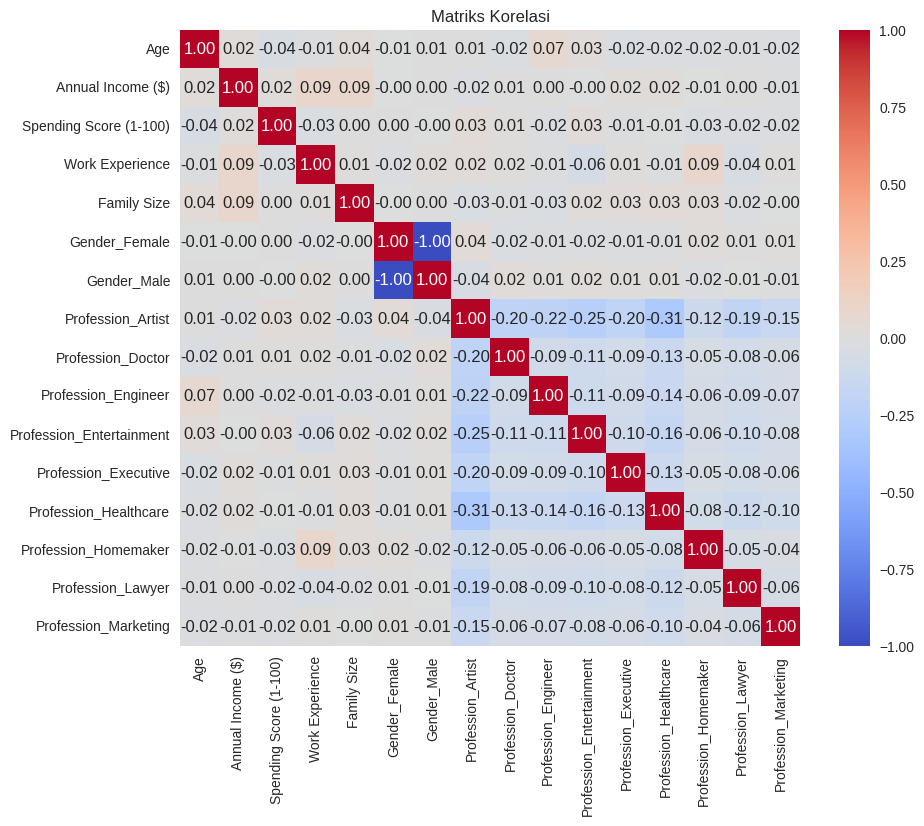

In [15]:
# matriks korelasi untuk melihat hubungan antar variabel setelah di encoding
correlation_matrix = df_proc2.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
# Data Train
X = df_proc2.iloc[:, ].values
X

array([[    19,  15000,     39, ...,      0,      0,      0],
       [    21,  35000,     81, ...,      0,      0,      0],
       [    20,  86000,      6, ...,      0,      0,      0],
       ...,
       [    87,  90961,     14, ...,      0,      0,      0],
       [    77, 182109,      4, ...,      0,      0,      0],
       [    90, 110610,     52, ...,      0,      0,      0]])

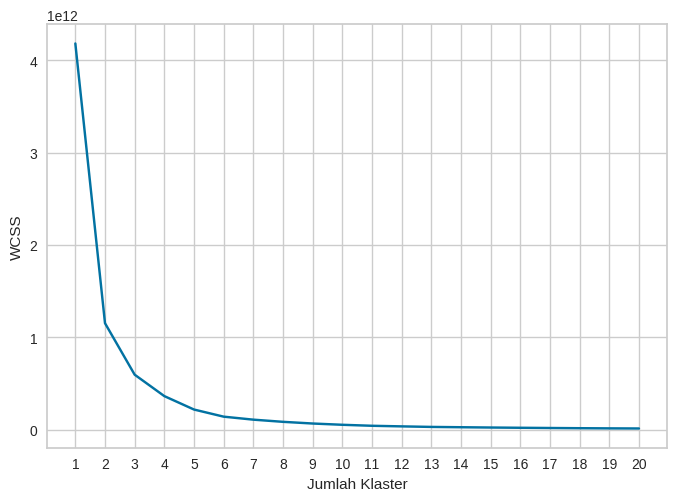

In [17]:
# inisialisasi paramter kmeans
kmeans_init = {
"init": "k-means++",
"n_init": 20,
"random_state": 42,
}

# Elbow Method
# buat list untuk menyimpan nilai WCSS untuk setiap k
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_init)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# visualisasikan hasil
plt.plot(range(1, 21), wcss)
plt.xticks(range(1, 21))
plt.xlabel("Jumlah Klaster")
plt.ylabel("WCSS")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

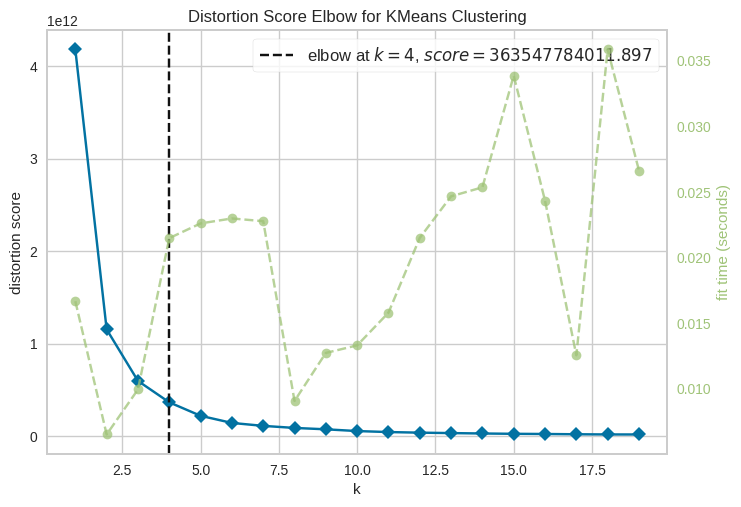

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Elbow Method dengan menggunakan KElbow Visualizer

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 20))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [19]:
# Hitung Skor Siluet untuk jumlah klaster yang berbeda
for n_clusters in range(2, 21):
    kmeans_iterate =  KMeans(n_clusters = n_clusters, n_init=20)
    cluster_labels = kmeans_iterate.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Jumlah Cluster = {n_clusters}, Silhouette Score = {silhouette_avg}")

Jumlah Cluster = 2, Silhouette Score = 0.6181459412084869
Jumlah Cluster = 3, Silhouette Score = 0.5576336532301296
Jumlah Cluster = 4, Silhouette Score = 0.53288260204758
Jumlah Cluster = 5, Silhouette Score = 0.5594612096096527
Jumlah Cluster = 6, Silhouette Score = 0.5703686188566708
Jumlah Cluster = 7, Silhouette Score = 0.5483242803553774
Jumlah Cluster = 8, Silhouette Score = 0.5353610858562335
Jumlah Cluster = 9, Silhouette Score = 0.5499629792294963
Jumlah Cluster = 10, Silhouette Score = 0.5547179239228639
Jumlah Cluster = 11, Silhouette Score = 0.5553063617374172
Jumlah Cluster = 12, Silhouette Score = 0.5497881578150587
Jumlah Cluster = 13, Silhouette Score = 0.5530844957435412
Jumlah Cluster = 14, Silhouette Score = 0.5460685648865174
Jumlah Cluster = 15, Silhouette Score = 0.5488072633402851
Jumlah Cluster = 16, Silhouette Score = 0.5414470563168411
Jumlah Cluster = 17, Silhouette Score = 0.5480088950409512
Jumlah Cluster = 18, Silhouette Score = 0.5475022410203695
Jumlah 

In [20]:
# inisiasi  k-means menggunakan jumlah klaster yang optimal
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=20, random_state=42)

# latih algoritma k-means dengan data
kmeans.fit(X)

# hasil label dari klasterisasi dengan kmeans
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans
df['Cluster']
df_proc['Cluster'] = y_kmeans
df_proc['Cluster']
df_proc2['Cluster'] = y_kmeans
df_proc2['Cluster']

,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
1995,0
1996,1
1997,1
1998,0


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

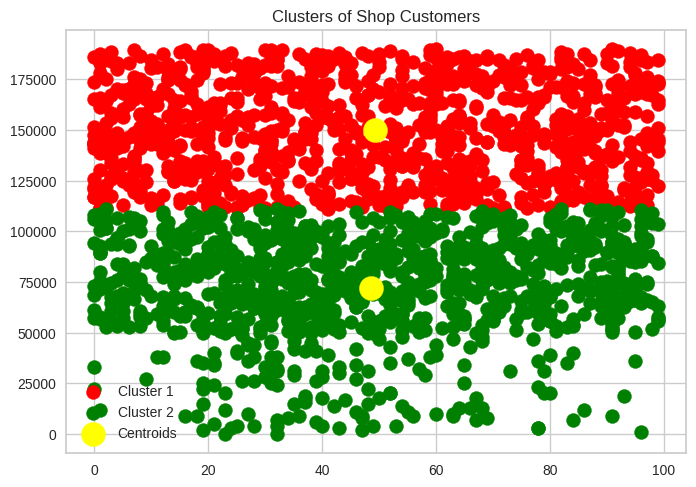

In [22]:
# Visualisasi hasil clustering dengan grafik scatter plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Shop Customers')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [23]:
# Data yang digunakan merupakan data yang telah melalui preprocessing dengan menangani missing value, tetapi data kategorik tidak diencoding pada data ini.
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              2000 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
 7   Cluster                 2000 non-null   int32 
dtypes: int32(1), int64(5), object(2)
memory usage: 117.3+ KB


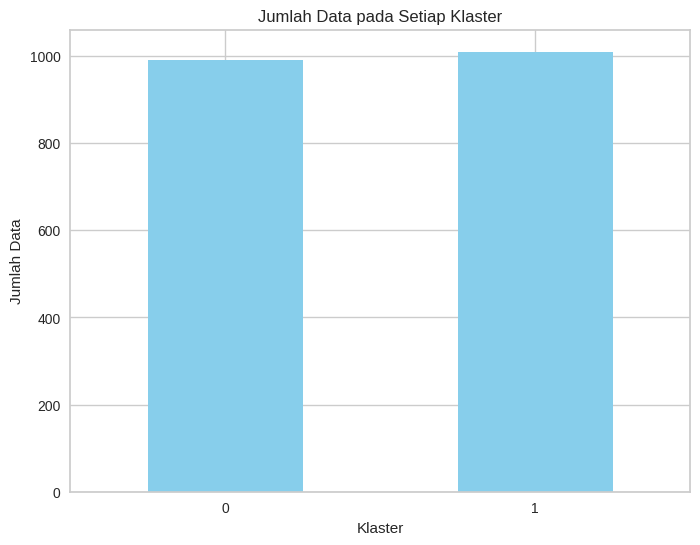

In [24]:
# Menghitung jumlah data dalam setiap klaster
cluster_counts = df_proc['Cluster'].value_counts().sort_index()

# Menampilkan hasil klastering dalam bentuk bar plot
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Data pada Setiap Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()

In [25]:
# kelompokpan fitur menjadi numerik dan kategorikal dengan klusternya
num_col = ['Age','Annual Income ($)', 'Spending Score (1-100)','Work Experience','Family Size', 'Cluster']
cat_col = ['Gender','Profession', 'Cluster']

In [26]:
# Analisis statistik deskriptif pada fitur numerik
cluster_summary_num = df_proc[num_col].groupby('Cluster').agg(['mean', 'std', 'median'])
print("Statistik Deskriptif Fitur Numerik Tiap Cluster:")
print(cluster_summary_num)

Statistik Deskriptif Fitur Numerik Tiap Cluster:
               Age                   Annual Income ($)                \
              mean        std median              mean           std   
Cluster                                                                
0        49.277778  29.514861   50.0     150041.481818  22886.083958   
1        48.648515  27.335420   47.0      72200.570297  25082.741119   

                  Spending Score (1-100)                   Work Experience  \
           median                   mean        std median            mean   
Cluster                                                                      
0        149494.0              52.120202  27.998532   51.0        4.424242   
1         74980.5              49.827723  27.839054   49.0        3.787129   

                         Family Size                   
              std median        mean       std median  
Cluster                                                
0        4.017633    4.0    3.9

In [27]:
# Analisis statistik deskriptif pada fitur kategorikal
cluster_summary_cat = df_proc[cat_col].groupby('Cluster').agg(
    Gender_Mode = ('Gender', lambda x: x.mode()[0]),
    Profession_Mode = ('Profession', lambda x: x.mode()[0])
)
print("Statistik Deskriptif Fitur Kategorikal Tiap Cluster:")
print(cluster_summary_cat)

Statistik Deskriptif Fitur Kategorikal Tiap Cluster:
        Gender_Mode Profession_Mode
Cluster                            
0            Female          Artist
1            Female          Artist


In [28]:
# Menghitung nilai frekuensi dari setiap fitur kategori per klaster
frequencies = {}
for cluster, group in df_proc[cat_col].groupby('Cluster'):
    frequencies[cluster] = {
        'Gender': group['Gender'].value_counts().to_dict(),
        'Profession': group['Profession'].value_counts().to_dict()
    }

# Menampilkan hasil
for cluster, freq in frequencies.items():
    print(f"Cluster {cluster + 1}:")
    for feature, counts in freq.items():
        print(f"Jumlah nilai {feature}: {counts}")

Cluster 1:
Jumlah nilai Gender: {'Female': 594, 'Male': 396}
Jumlah nilai Profession: {'Artist': 306, 'Healthcare': 171, 'Entertainment': 115, 'Engineer': 91, 'Doctor': 81, 'Executive': 80, 'Lawyer': 73, 'Marketing': 45, 'Homemaker': 28}
Cluster 2:
Jumlah nilai Gender: {'Female': 592, 'Male': 418}
Jumlah nilai Profession: {'Artist': 341, 'Healthcare': 168, 'Entertainment': 119, 'Engineer': 88, 'Doctor': 80, 'Executive': 73, 'Lawyer': 69, 'Marketing': 40, 'Homemaker': 32}


In [29]:
# Fungsi untuk menampilkan visualisasi distribusi fitur numerik per cluster
def plot_numeric_distribution(df, numeric_features, cluster_col):
    """
      Tujuan : Menampilkan visualisasi distribusi fitur numerik per cluster.

      Parameters:
        df : data frame yang telah melewati proses pre-processing. Namun tidak melalui proses encoding.
        numeric_features : kolom numerik pada dataframe
        cluster_col : kolom berisi klaster

      Returns:
        None
    """
    for feature in numeric_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue=cluster_col, kde=True, palette='Set2', bins=10)
        plt.title(f'Distribusi {feature} per Cluster', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.legend(title='Cluster', labels=[f'Cluster {i+1}' for i in df[cluster_col].unique()])
        plt.show()

# Fungsi untuk menampilkan distribusi fitur kategori per cluster
def plot_categorical_distribution(df, categorical_features, cluster_col):
    """
      Tujuan : Menampilkan visualisasi distribusi fitur kategori per cluster.

      Parameters:
        df : data frame yang telah melewati proses pre-processing. Namun tidak melalui proses encoding.
        categorical_features : kolom kategorik pada dataframe
        cluster_col : kolom berisi klaster

      Returns:
        None
    """
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, hue=cluster_col, palette='Set3')
        plt.title(f'Distribusi {feature} per Cluster', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.legend(title='Cluster', labels=[f'Cluster {i+1}' for i in df[cluster_col].unique()])
        plt.show()

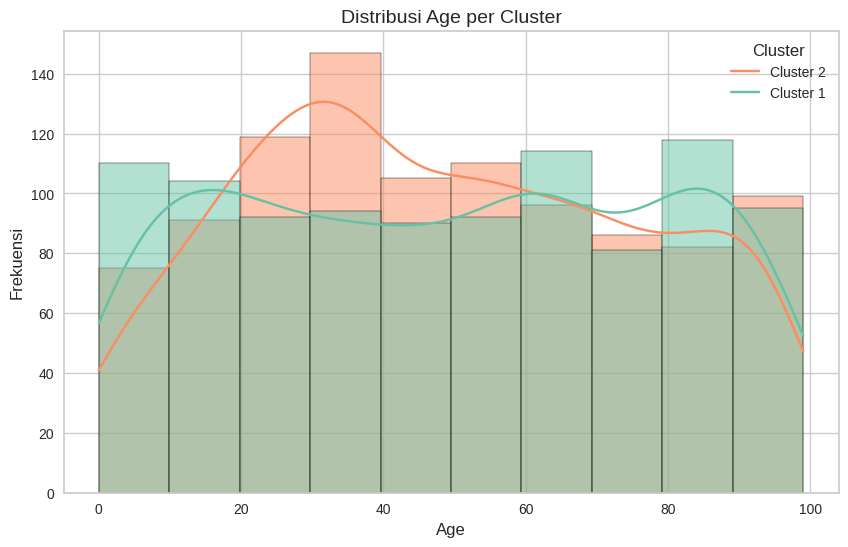

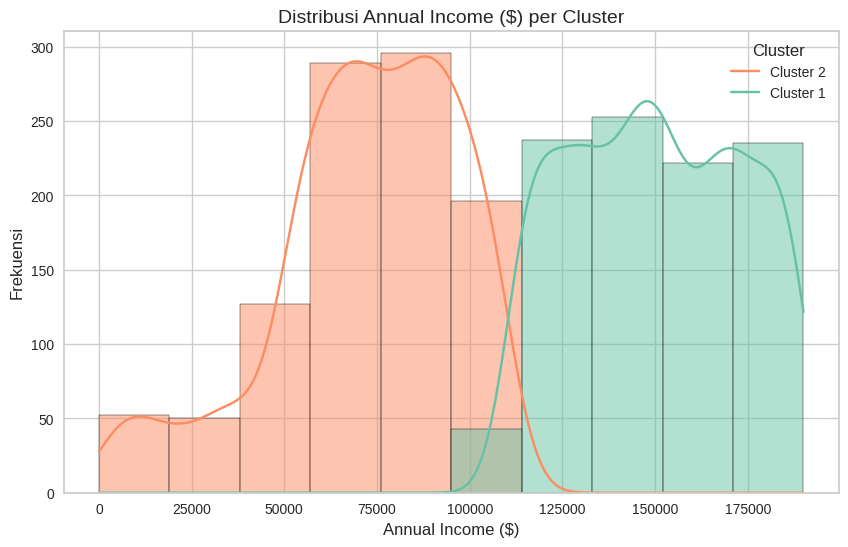

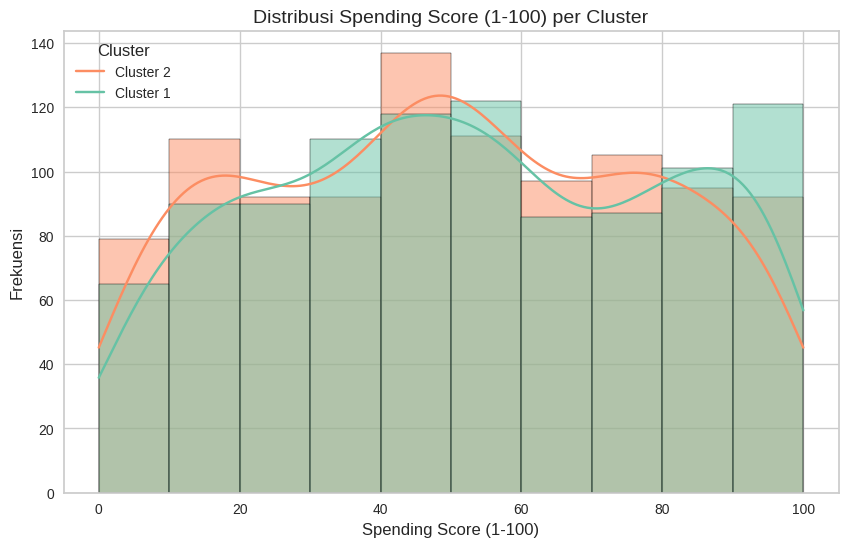

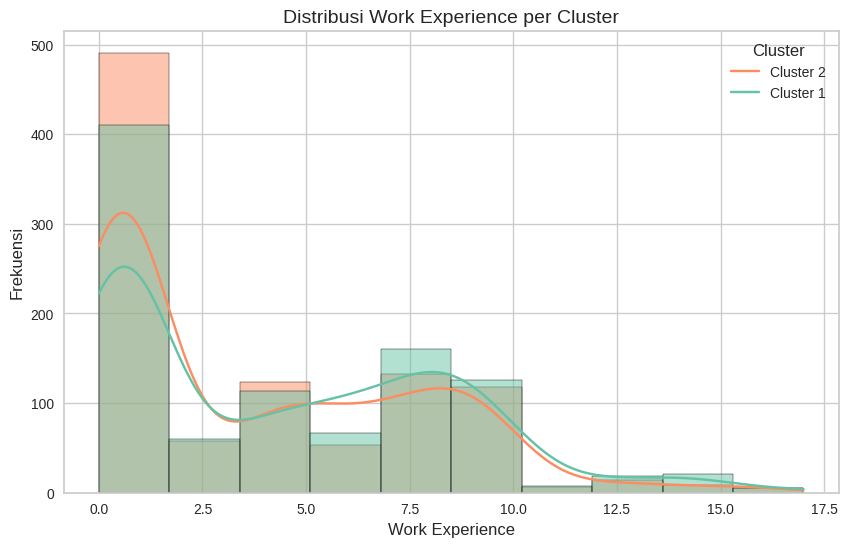

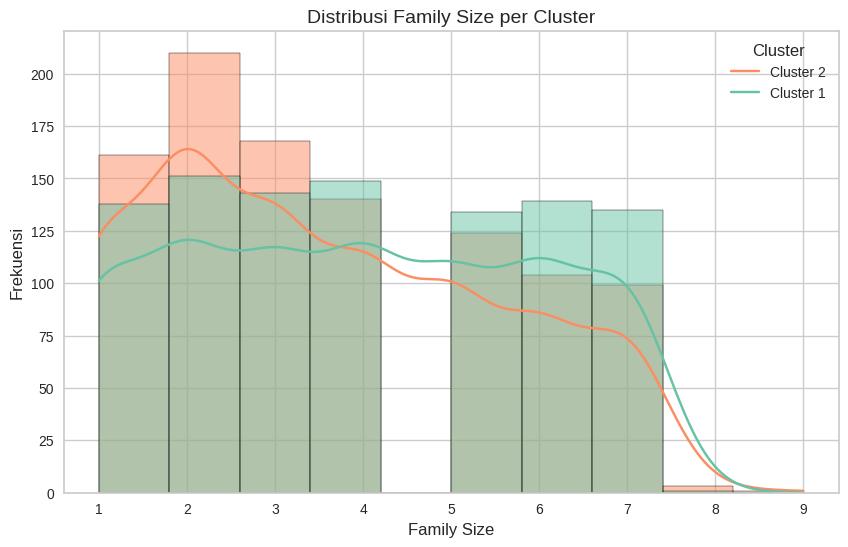

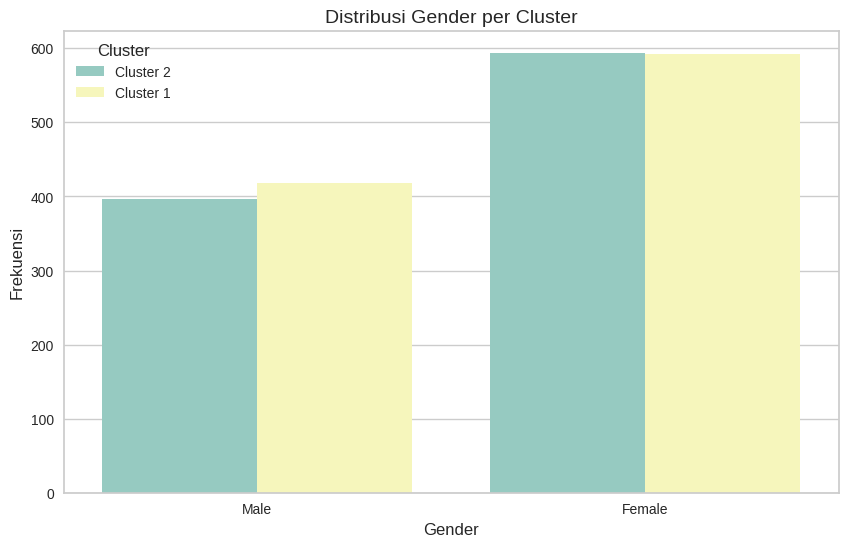

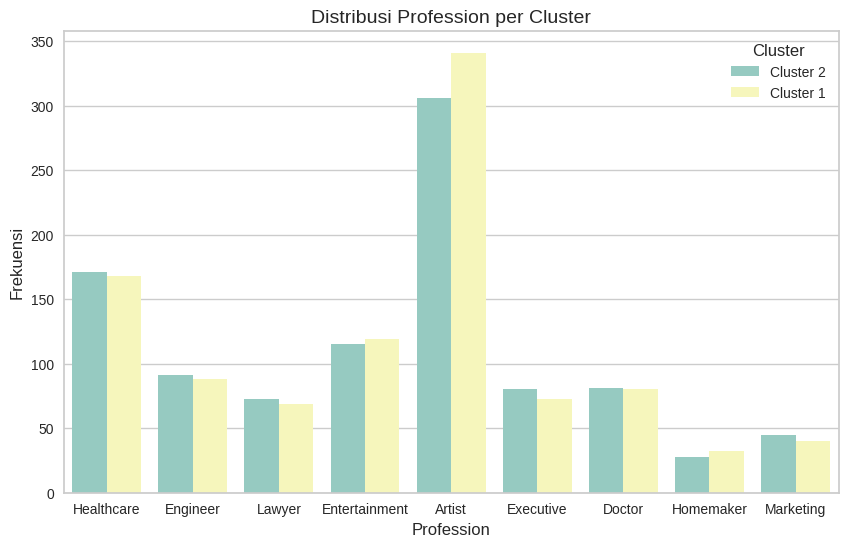

In [30]:
# pisahkan kolom numerik dan kategorikal
num_col = ['Age','Annual Income ($)', 'Spending Score (1-100)','Work Experience','Family Size']
cat_col = ['Gender','Profession']

# Hasil visualisasi dengan memanggil fungsi di atas
plot_numeric_distribution(df_proc, num_col, 'Cluster')
plot_categorical_distribution(df_proc, cat_col, 'Cluster')

Tulis hasil interpretasinya di sini.
1. Cluster 1:

   - Rata-rata **Age** (0 - 99) = 49.27
   - Rata-rata **Annual Income ($)** (0 - 189974) = 150041.48
   - Rata-rata **Spending Score** (1 - 100) = 52.12
   - Rata-rata **Work Experience** (0 - 17) = 4.42
   - Rata-rata **Family Size** (1 - 9) = 3.96
   - Modus **Gender** = Female
   - Modus **Profession** = Artist
   - **Analisis** : Cluster ini mencakup pelanggan dengan pendapatan tahunan yang tinggi berkisar pada 150 ribu dolar. Jika dilihat dari rata-rata spending score yang lebih dari 50%, maka pada cluster ini, pelanggan cenderung untuk spending pendapatan mereka. Pelanggan pada cluster ini rata-rata berusia 49.27 dengan mayoritas berasal dari pelanggan berusia sekitar 80 tahun, tetapi usia pelanggan pada cluster ini terdistribusi cukup merata yang berarti bahwa jumlah pelanggan untuk setiap usia tidak jauh berbeda. Kemudian rata-rata pelanggan pada cluster ini sudah memiliki pengalaman bekerja hampir 4 tahun dan rata-rata sudah berkeluarga dengan 3-4 anggota keluarga dan mayoritas memiliki 2 orang anggota keluarga. Dan juga, pelanggan pada cluster ini didominasi oleh perempuan dan atau pelanggan dengan profesi artist.
2. Cluster 2:

   - Rata-rata **Age** (0 - 99) = 48.65
   - Rata-rata **Annual Income ($)** (0 - 189974) = 72200.57
   - Rata-rata **Spending Score** (1 - 100) = 49.83
   - Rata-rata **Work Experience** (0 - 17) = 3.79
   - Rata-rata **Family Size** (1 - 9) = 3.58
   - Modus **Gender** = Female
   - Modus **Profession** = Artist
   - **Analisis** : Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang lebih rendah daripada cluster 1, dimana rata-rata pelanggan memiliki pendapatan tahunan berkisar pada 72 ribu dolar. Jika dilihat dari rata-rata spending score, pelanggan cenderung tidak punya kebiasaan membelanjakan uangnya dibuktikan pada spending score yang bernilai dibawah 50%. Pelangga pada cluster ini rata-rata berusia 48.65 tahun dengan mayoritas 40 tahun. Kemudian, pada cluster ini, rata-rata pelanggan sudah memiliki pengalaman kerja selama hampir 4 tahun dan sudah berkeluarga dengan anggota keluarga berkisar antara 3 - 4 orang. Pada cluster ini, didominasi oleh pelanggan perempuan dan atau orang dengan profesi artist.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
df_proc2.to_csv('Customer_final.csv', index=False)